# Denetimli Ogrenme ve K En Yakin Komsu Alistirmalari

# Giris

Bu hafta alistirmamizda telekom endustrisi musteri
verileri kullanilacaktir. Veri dosyamizin adi: `Orange_Telecom_Churn_Data.csv`. Bu dosya önce yuklenip, bazi on islemler yapilarak ve hesap ozelliklerine gore musteri karmasasini tahmin etmek icin k-en yakin komsu algoritmasi kullanilacaktir.


In [ ]:
from __future__ import print_function
import os
data_path = ['data']

## Soru 1

* Verileri ice aktarma ile baslayin. Sutunlari ve verileri inceleyin.
* Her bir kayita ait bir eyalet adi, alan kodu ve telefon numarasi icerdigine dikkat edin. Sizce bu sutunlar bir makine ogrenimi modeli olustururken kullanilacak iyi özellikler midir, Neden?

Bu sutunlari kullanmayacagiz, bu nedenle cikarin.


In [254]:
import pandas as pd

#  Dosya yolunu kullanarak verileri ice aktarin
data = pd.read_csv('Orange_Telecom_Churn_Data.csv')

In [255]:
data.head(1).T

,0
state,KS
account_length,128
area_code,415
phone_number,382-4657
intl_plan,no
voice_mail_plan,yes
number_vmail_messages,25
total_day_minutes,265.1
total_day_calls,110
total_day_charge,45.07


In [256]:
# Ekstra sutunlari kaldirin
data.drop(['state', 'area_code', 'phone_number'], axis=1, inplace=True)

In [257]:
data.columns

Index(['account_length', 'intl_plan', 'voice_mail_plan',
       'number_vmail_messages', 'total_day_minutes', 'total_day_calls',
       'total_day_charge', 'total_eve_minutes', 'total_eve_calls',
       'total_eve_charge', 'total_night_minutes', 'total_night_calls',
       'total_night_charge', 'total_intl_minutes', 'total_intl_calls',
       'total_intl_charge', 'number_customer_service_calls', 'churned'],
      dtype='object')

## Soru 2

* Bazi sutunlarin kategorik deger ve bazilarinin da float deger olduguna dikkat edin. Bu ozelliklerin dersteki yontemlerden biri kullanilarak sayisal degere cevirilmesi gerekecektir.

* Son olarak, k-en yakın komsu yonteminde kategorik degerler gerektirdigini unutmayin. Derste bahsedilen olcekleme yontemlerinden birini kullanarak verileri kategorik hale getirin.

In [258]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()

for col in ['intl_plan', 'voice_mail_plan', 'churned']:
    data[col] = lb.fit_transform(data[col])

In [259]:
# Sklearn uyarısını yoksayalim
import warnings
warnings.filterwarnings('ignore', module='sklearn')

from sklearn.preprocessing import MinMaxScaler

msc = MinMaxScaler()

data = pd.DataFrame(msc.fit_transform(data),  #Bu bir np.array, dataframe degil.
                    columns=data.columns)

## Soru 3

* Ozellik sutunlarini (`churned` haric her sey) hedef sutundan (`churned`) ayirin. Bu sekilde iki tablo olusur.
* Bu veriler ile `k=3`degerine sahip k-en yakın komsu modeli olusturun ve ayni veriler uzerinde tahmin gerceklestirin.

In [260]:
# Hedef Sutun harici butun sutunlari ayrica tutalim
x_cols = [x for x in data.columns if x != 'churned']

# Verileri iki dataframe'e bolme
X_data = data[x_cols]
y_data = data['churned']

# # alternatif yontem olarak:
# X_data = data.copy()
# y_data = X_data.pop('churned')

In [261]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

knn = knn.fit(X_data, y_data)

y_pred = knn.predict(X_data)

## Soru 4

Hatayi olcme yontemleri henuz sinifta anlatilmamis olabilir, en azindan Huseyin Hoca bana oyle soyledi :) ancak dogruluk tespiti oldukca kolaydir - sadece dogru tahmin edilen etiketlerin yüzdesidir.

* Gercek deger ile tahmin edilen etiket degerlerini kullanarak dogruluk hesaplamak icin bir fonksiyon yazin.
* Bu Fonksiyonu kullanarak, k-en yakın komsu modelinin veriler uzerindeki dogrulugunu hesaplayip ekranda gosterin.

In [262]:
# Dogru tahmin edilen degerlerin yuzdesini hesaplama fonksiyonu

def accuracy(real, predict):
    return sum(y_data == y_pred) / float(real.shape[0])

In [263]:
accuracy(y_data, y_pred)

0.9422

## Soru 5

* K-en yakın komsu modelini tekrar `n_neighbors=3` ile olusturun ancak bu sefer agirlikli mesafe yontemini kullanin. Yukarida olusturdugunuz islevi kullanarak dogrulugu hesaplayin.
* Baska bir k-en yakin komşu modeli olusturun. Bu kez esit agirliklar kullanin ancak Minkowski mesafe metrigi icin guc parametresini 1 (`p=1`) olarak ayarlayin. Örnek: Manhattan Mesafesi.

Bu sorunun 1. kısmı icin agirlikli mesafeler kullanildiginda, dogruluk icin 1.0 degeri elde edilmelidir. Bunun neden oldugunu dusunun? *Ipucu:* verileri tahmin ederken kNN de model *verinin kendisidir*. Bir sonraki derste bu tuzaktan nasil kacinacagimizi ögrenecegiz.

In [264]:
#Ogrencinin kodu yazacagi yer

In [265]:

knn1 = KNeighborsClassifier(n_neighbors=3, weights = "distance")

knn1 = knn1.fit(X_data, y_data)

y_pred1 = knn1.predict(X_data)

In [266]:
def accuracy(real, predict):
    return sum(y_data == y_pred1) / float(real.shape[0])

In [267]:
accuracy(y_data, y_pred1)

1.0

In [268]:
knn2 = KNeighborsClassifier(n_neighbors=3, weights = "uniform",
                            metric= "minkowski", p=1)

knn2 = knn2.fit(X_data, y_data)

y_pred2 = knn2.predict(X_data)

In [269]:
def accuracy(real, predict):
    return sum(y_data == y_pred2) / float(real.shape[0])

In [270]:
accuracy(y_data, y_pred2)

0.9456

## Soru 6

* 1 ile 20 arasında değişen `k` (`n_neighbors`) degerlerini kullanarak k-en yakin komsu modellerini olusturun. Bu esnada varsayilan agirlik degerini kullanin. Minkowski mesafesi (`p`) katsayisi 1 veya 2 olarak ayarlanabilir. Sadece bu parametreler her biri icin ayni secilmelidir. Sonuc olarak elde edilen k degerleri ile dogruluk degerlerini bir sozlukte tutup gosterın.

* Elde edilen bu `accuracy` ile `k` degerlerini grafikte gorsellestirin. `k=1`oldugunda ne oldugunu fark ettiniz mi? Bunun neden oldugunu dusunuyorsunuz? *Ipucu:* Yukarida tartisilan ile ayni nedenden oturu.

In [271]:
#Ogrencinin kodu yazacagi yer

In [272]:
ACCURACY = [] 
for k in np.arange(20):
    k = k+1
    knn_model=KNeighborsClassifier(n_neighbors=k, weights = "uniform",
                            metric= "minkowski", p=1).fit(X_data, y_data)
    y_pred = knn_model.predict(X_data) 
    doğruluk=accuracy_score(y_data,y_pred)
    ACCURACY.append(doğruluk) 
    print("k =" , k , "için doğruluk değeri: ", doğruluk)

k = 1 için doğruluk değeri:  1.0
k = 2 için doğruluk değeri:  0.9286
k = 3 için doğruluk değeri:  0.9456
k = 4 için doğruluk değeri:  0.9214
k = 5 için doğruluk değeri:  0.9356
k = 6 için doğruluk değeri:  0.9216
k = 7 için doğruluk değeri:  0.929
k = 8 için doğruluk değeri:  0.917
k = 9 için doğruluk değeri:  0.9256
k = 10 için doğruluk değeri:  0.9126
k = 11 için doğruluk değeri:  0.921
k = 12 için doğruluk değeri:  0.9124
k = 13 için doğruluk değeri:  0.9178
k = 14 için doğruluk değeri:  0.9096
k = 15 için doğruluk değeri:  0.9146
k = 16 için doğruluk değeri:  0.9074
k = 17 için doğruluk değeri:  0.9126
k = 18 için doğruluk değeri:  0.9054
k = 19 için doğruluk değeri:  0.9104
k = 20 için doğruluk değeri:  0.9022


In [278]:
ACCURACY[:10]

[1.0, 0.9286, 0.9456, 0.9214, 0.9356, 0.9216, 0.929, 0.917, 0.9256, 0.9126]

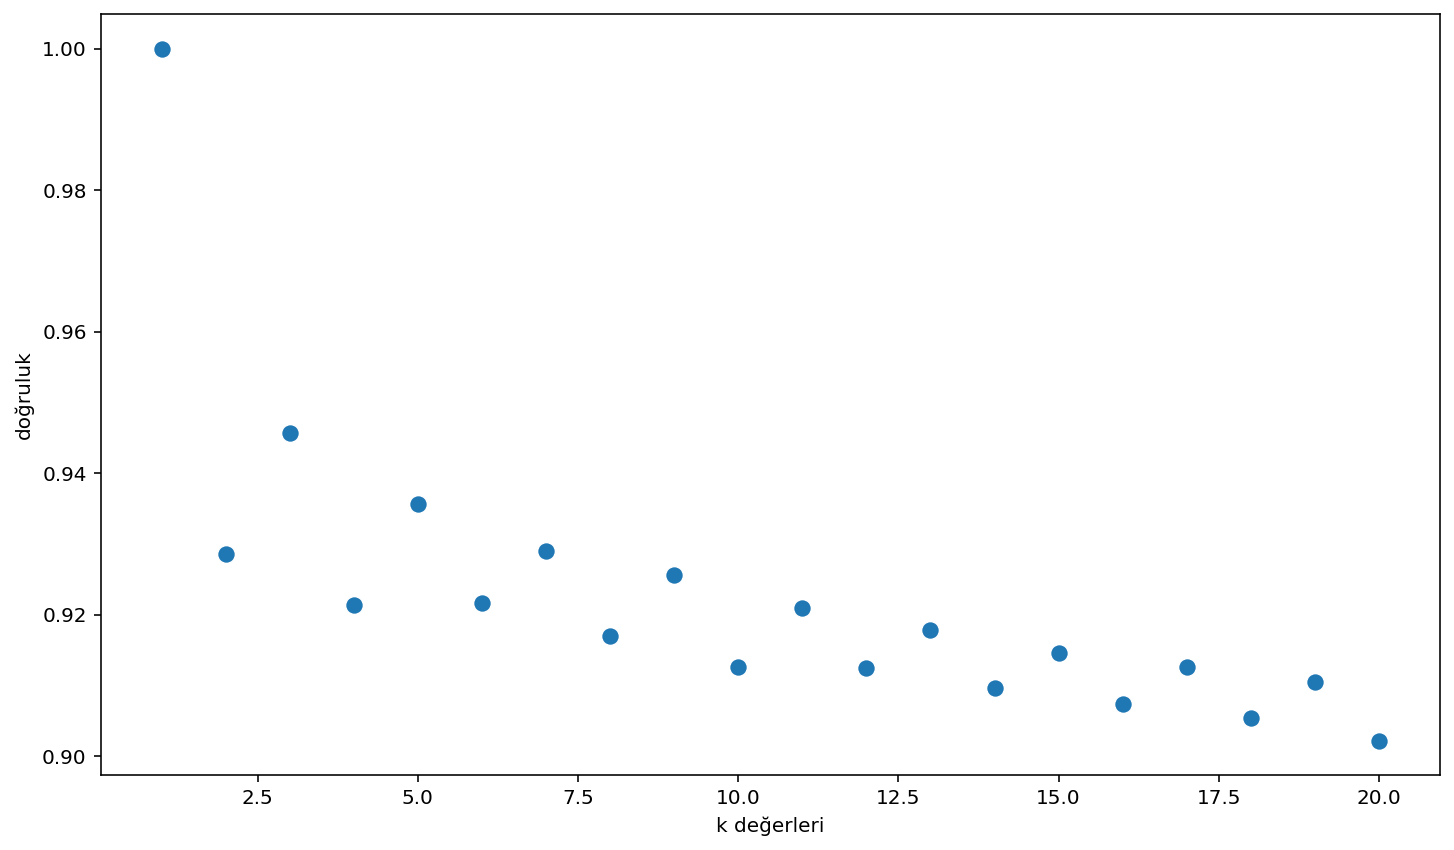

In [279]:
import seaborn as sns
sns.scatterplot(np.arange(1,21),ACCURACY,s=80)
plt.xlabel("k değerleri")
plt.ylabel("doğruluk");